In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

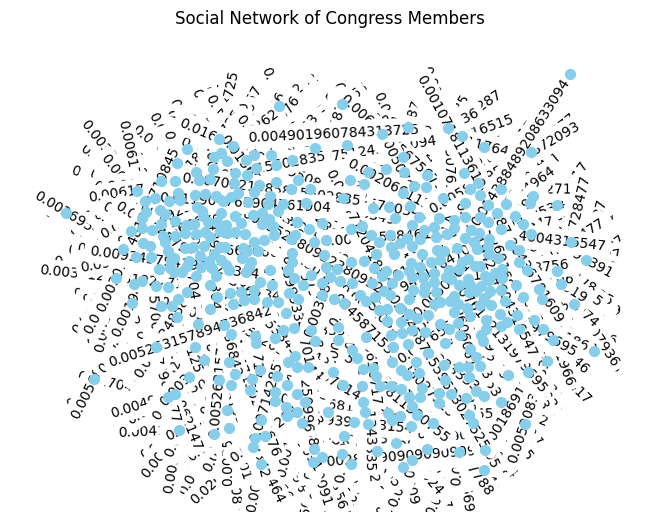

In [40]:
edge_list_file = './congress.edgelist'

G = nx.read_edgelist(edge_list_file)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network of Congress Members')
plt.show()

In [41]:
edge_list = []

with open(edge_list_file) as f:
    for line in f:
        components = line.strip().split()
        source_node = int(components[0])
        target_node = int(components[1])
        edge = (source_node, target_node)
        edge_list.append(edge)

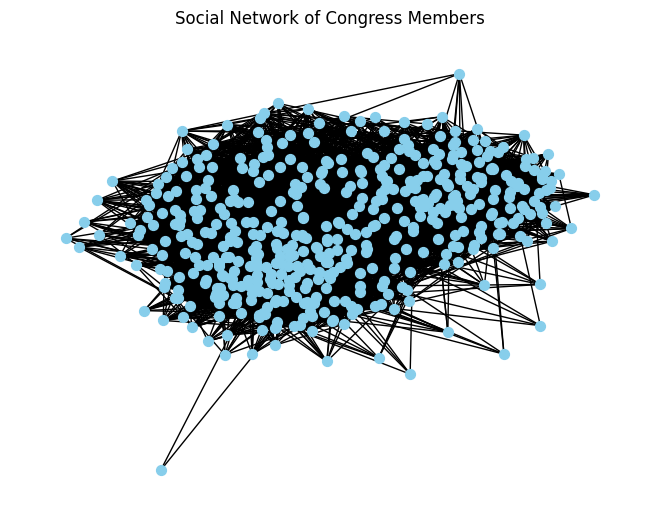

In [65]:
G = nx.Graph()
G.add_edges_from(edge_list)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network of Congress Members')
plt.show()

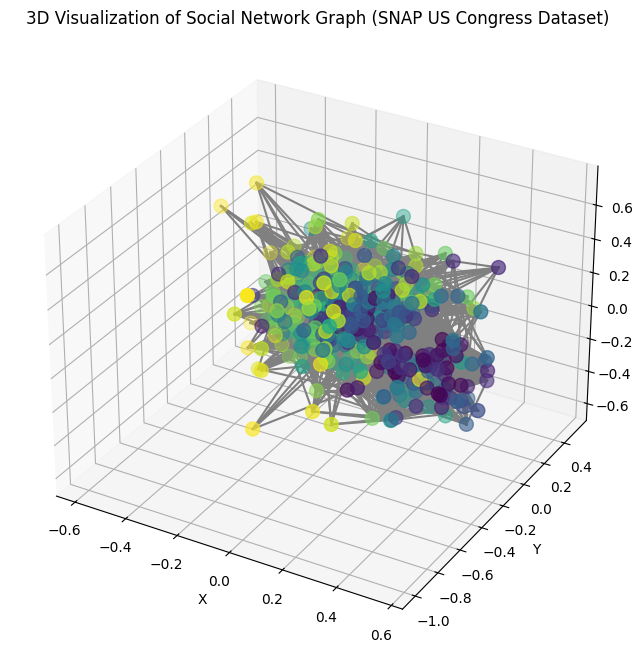

In [43]:
G = nx.Graph()


G.add_edges_from(edge_list)


pos = nx.spring_layout(G, dim=3)

nodes = G.nodes()
node_colors = range(len(nodes))
x = [pos[node][0] for node in nodes]
y = [pos[node][1] for node in nodes]
z = [pos[node][2] for node in nodes]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=node_colors, cmap='viridis', s=100)

for u, v in G.edges():
    ax.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], [pos[u][2], pos[v][2]], color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3D Visualization of Social Network Graph (SNAP US Congress Dataset)')

plt.show()

In [55]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Number of connected components:', nx.number_connected_components(G))
print('Nodes', G.nodes())
node_as_integers = [int(node) for node in G.nodes()]
sorted_nodes = sorted(node_as_integers)

print('Sorted Nodes',sorted_nodes)

Number of nodes: 475
Number of edges: 10222
Number of connected components: 1
Nodes [0, 4, 12, 18, 25, 30, 46, 55, 58, 59, 74, 76, 77, 85, 86, 87, 154, 168, 341, 374, 401, 3, 14, 17, 24, 27, 64, 79, 84, 88, 89, 149, 179, 197, 213, 224, 243, 250, 268, 286, 293, 315, 447, 460, 11, 13, 32, 57, 91, 126, 162, 254, 255, 327, 334, 392, 398, 448, 454, 470, 2, 9, 28, 42, 50, 54, 68, 110, 217, 229, 299, 442, 48, 53, 61, 71, 75, 80, 111, 123, 136, 147, 193, 205, 215, 247, 278, 387, 393, 403, 450, 452, 21, 47, 70, 72, 138, 160, 161, 190, 234, 246, 260, 306, 335, 389, 415, 422, 428, 20, 26, 36, 38, 130, 139, 201, 207, 251, 325, 349, 358, 367, 371, 423, 5, 90, 92, 119, 122, 135, 155, 165, 177, 256, 424, 465, 467, 6, 15, 35, 60, 81, 82, 148, 183, 375, 381, 411, 416, 437, 439, 8, 10, 37, 180, 262, 263, 281, 292, 351, 368, 376, 405, 433, 33, 65, 287, 329, 364, 23, 66, 117, 137, 266, 336, 400, 444, 466, 7, 51, 63, 188, 280, 296, 431, 443, 43, 73, 214, 311, 326, 408, 421, 121, 143, 169, 259, 410, 96, 105

In [48]:
def find_shortest_path(graph, source, target):
    try:
        path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        distance = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
        return path, distance
    except nx.NetworkXNoPath:
        return "No path found", float('inf')

source_node = int(input('Enter the source node: '))
target_node = int(input('Enter the target node: '))

shortest_path, distance = find_shortest_path(G, source_node, target_node)


print("Shortest path:", shortest_path)



Source node 1 is not in the graph.
Target node 2 is not in the graph.
Shortest path: [1, 21, 2]
Distance: 2


In [57]:
def find_shortest_path(graph, source, target):
    try:
        path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        distance = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
        return path, distance
    except nx.NetworkXNoPath:
        return "No path found", float('inf')


source_node = 0
largest_shortest_path = []

for i in range(1, 475):
    target_node = i
    shortest_path, distance = find_shortest_path(G, source_node, target_node)
    print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")
    if distance > largest_distance:
        largest_distance = distance
    
    if len(shortest_path) > len(largest_shortest_path):
        largest_shortest_path = shortest_path



    print()

print('**************************')
print(f"Largest shortest path: {largest_shortest_path}")

Shortest path from 0 to 1: [0, 11, 1]
Distance from 0 to 1: 2

Shortest path from 0 to 2: [0, 18, 2]
Distance from 0 to 2: 2

Shortest path from 0 to 3: [0, 4, 3]
Distance from 0 to 3: 2

Shortest path from 0 to 4: [0, 4]
Distance from 0 to 4: 1

Shortest path from 0 to 5: [0, 55, 5]
Distance from 0 to 5: 2

Shortest path from 0 to 6: [0, 58, 6]
Distance from 0 to 6: 2

Shortest path from 0 to 7: [0, 77, 7]
Distance from 0 to 7: 2

Shortest path from 0 to 8: [0, 59, 8]
Distance from 0 to 8: 2

Shortest path from 0 to 9: [0, 9]
Distance from 0 to 9: 1

Shortest path from 0 to 10: [0, 59, 10]
Distance from 0 to 10: 2

Shortest path from 0 to 11: [0, 11]
Distance from 0 to 11: 1

Shortest path from 0 to 12: [0, 12]
Distance from 0 to 12: 1

Shortest path from 0 to 13: [0, 13]
Distance from 0 to 13: 1

Shortest path from 0 to 14: [0, 4, 14]
Distance from 0 to 14: 2

Shortest path from 0 to 15: [0, 58, 15]
Distance from 0 to 15: 2

Shortest path from 0 to 16: [0, 50, 16]
Distance from 0 to 

In [58]:
import networkx as nx

degree_centrality = nx.degree_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

eigenvector_centrality = nx.eigenvector_centrality(G)

print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")


Degree Centrality:
Node 0: 0.06962025316455696
Node 4: 0.0970464135021097
Node 12: 0.09071729957805906
Node 18: 0.06751054852320675
Node 25: 0.12447257383966244
Node 30: 0.11392405063291139
Node 46: 0.12447257383966244
Node 55: 0.11181434599156118
Node 58: 0.12447257383966244
Node 59: 0.11603375527426159
Node 74: 0.0970464135021097
Node 76: 0.08016877637130801
Node 77: 0.09915611814345991
Node 85: 0.08016877637130801
Node 86: 0.0780590717299578
Node 87: 0.1729957805907173
Node 154: 0.12658227848101264
Node 168: 0.03797468354430379
Node 341: 0.11392405063291139
Node 374: 0.12447257383966244
Node 401: 0.19198312236286919
Node 3: 0.09915611814345991
Node 14: 0.07594936708860758
Node 17: 0.20042194092827004
Node 24: 0.11181434599156118
Node 27: 0.12236286919831223
Node 64: 0.09915611814345991
Node 79: 0.09071729957805906
Node 84: 0.09493670886075949
Node 88: 0.09493670886075949
Node 89: 0.10970464135021096
Node 149: 0.1582278481012658
Node 179: 0.19198312236286919
Node 197: 0.1434599156118

In [59]:
import community 

def detect_communities(graph):
    
    undirected_graph = graph.to_undirected()
    
    partition = community.best_partition(undirected_graph)
    
    community_nodes = {community_id: [] for community_id in set(partition.values())}
    for node, community_id in partition.items():
        community_nodes[community_id].append(node)
    
    return community_nodes

community_nodes = detect_communities(G)

print("Nodes in each community:")
for community_id, nodes in community_nodes.items():
    print(f"Community {community_id}: {nodes}")


Nodes in each community:
Community 0: [255, 452, 161, 190, 234, 246, 260, 306, 335, 389, 422, 428, 130, 201, 251, 437, 351, 329, 137, 266, 336, 188, 214, 143, 105, 174, 318, 200, 211, 471, 419, 429, 440, 464, 192, 426, 459, 185, 233, 245, 132, 134, 223, 257, 322, 323, 370, 409, 97, 226, 417, 209, 413, 294, 218, 386, 113, 249, 314, 449, 114, 219, 269, 396, 271, 399, 432, 238, 360, 383, 384, 103, 116, 125, 208, 220, 242, 244, 248, 261, 276, 301, 324, 343, 354, 382, 385, 407, 441, 104, 141, 175, 199, 237, 277, 289, 290, 309, 310, 418, 101, 340, 350, 95, 112, 129, 144, 150, 203, 241, 295, 302, 312, 427, 462, 198, 216, 380, 265, 363, 283, 191, 359, 131, 151, 210, 339, 344, 93, 133, 288, 468, 458, 159, 258, 337, 319, 388, 231, 118, 140, 164, 228, 333, 338, 406, 106, 472, 239, 274, 474, 430, 451, 362, 163, 196, 273, 206, 307, 120, 357, 98, 235, 328, 124, 457, 34, 158, 227, 356, 456]
Community 1: [0, 4, 12, 18, 25, 30, 46, 55, 58, 59, 74, 76, 77, 85, 86, 87, 3, 14, 17, 24, 27, 64, 79, 84, 88, 

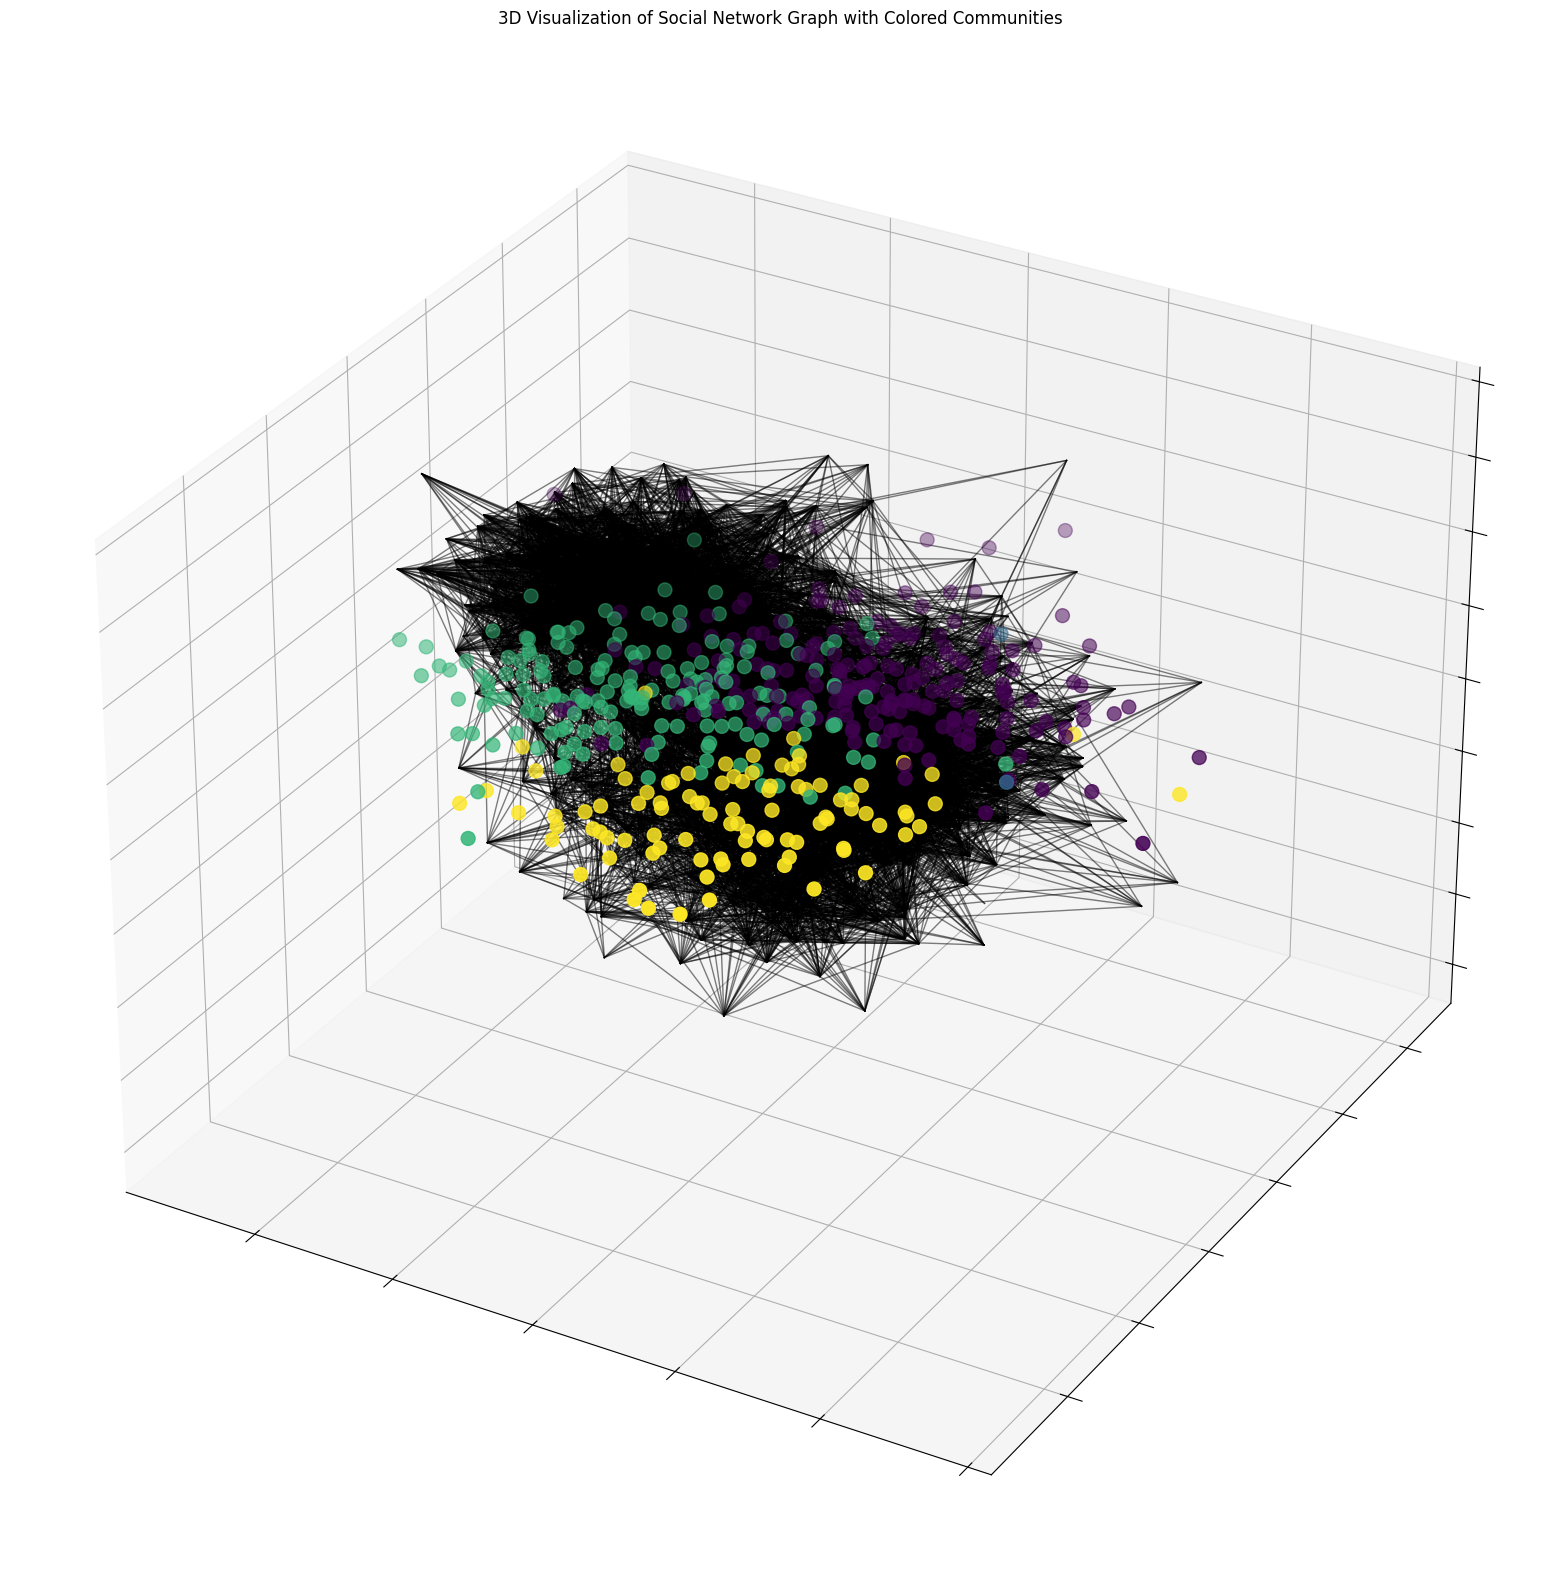

In [63]:
def detect_communities(graph):
    undirected_graph = graph.to_undirected()
    partition = community.best_partition(undirected_graph)
    community_nodes = {community_id: [] for community_id in set(partition.values())}
    for node, community_id in partition.items():
        community_nodes[community_id].append(node)
    return partition, community_nodes

def plot_3d_graph_with_communities(graph, pos, partition, community_nodes):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    node_colors = [partition[node] for node in graph.nodes()]

    nx.draw_networkx_nodes(graph, pos, ax=ax, node_color=node_colors, node_size=100)

    for edge in graph.edges():
        u, v = edge
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        z = [pos[u][2], pos[v][2]]
        ax.plot(x, y, z, color='black', linewidth=1, alpha=0.5) 

    
    plt.title('3D Visualization of Social Network Graph with Colored Communities')

    plt.show()



partition, community_nodes = detect_communities(G)


pos = nx.spring_layout(G, dim=3)

plot_3d_graph_with_communities(G, pos, partition, community_nodes)
